In [1]:
#Import dependency
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from datetime import datetime
import requests
import psycopg2
# import config as creds
import csv


In [4]:
df = pd.read_csv('Resources/airbnb_clean.csv')
df.head()

,_id,accomodates,air_conditioning,bathrooms,bed_type,bedrooms,beds,cable_tv,cancellation_policy,carbon_monoxide,...,price,property_type,review_scores_rating,room_type,security_deposit,shampoo,smoke_detector,washer,wheelchair_accessible,wireless_internet
0,60f1a2f1bc9dc8e90a6f1e08,2,1,1.0,Real Bed,0,1,1,strict,0,...,150,Apartment,0,Entire home/apt,0,0,1,1,0,1
1,60f1a2f1bc9dc8e90a6f1df9,2,0,1.0,Real Bed,1,1,0,flexible,0,...,69,Apartment,0,Private room,0,1,0,1,0,1
2,60f1a2f1bc9dc8e90a6f1e03,5,1,1.0,Real Bed,1,2,1,strict,1,...,225,Apartment,80,Entire home/apt,0,0,1,1,0,1
3,60f1a2f1bc9dc8e90a6f1e0d,1,0,1.5,Real Bed,1,1,0,strict,0,...,45,House,100,Private room,0,1,0,0,0,1
4,60f1a2f1bc9dc8e90a6f1e13,1,1,1.0,Real Bed,1,1,0,flexible,1,...,65,Apartment,0,Private room,0,0,1,1,0,1


**Final Data Cleaning before importing the dataset into our model**

In [5]:
df.drop(columns=["_id"], axis=1, inplace=True)
df

,accomodates,air_conditioning,bathrooms,bed_type,bedrooms,beds,cable_tv,cancellation_policy,carbon_monoxide,checkin_24hr,...,price,property_type,review_scores_rating,room_type,security_deposit,shampoo,smoke_detector,washer,wheelchair_accessible,wireless_internet
0,2,1,1.0,Real Bed,0,1,1,strict,0,0,...,150,Apartment,0,Entire home/apt,0,0,1,1,0,1
1,2,0,1.0,Real Bed,1,1,0,flexible,0,0,...,69,Apartment,0,Private room,0,1,0,1,0,1
2,5,1,1.0,Real Bed,1,2,1,strict,1,0,...,225,Apartment,80,Entire home/apt,0,0,1,1,0,1
3,1,0,1.5,Real Bed,1,1,0,strict,0,1,...,45,House,100,Private room,0,1,0,0,0,1
4,1,1,1.0,Real Bed,1,1,0,flexible,1,0,...,65,Apartment,0,Private room,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2,1,1.0,Real Bed,1,1,1,strict,1,1,...,189,Condominium,92,Entire home/apt,400,1,1,1,0,1
3581,4,1,1.0,Real Bed,2,2,1,strict,1,1,...,229,Apartment,80,Entire home/apt,400,1,1,0,0,1
3582,4,1,1.5,Real Bed,1,1,1,moderate,1,0,...,130,Loft,100,Entire home/apt,250,0,1,1,0,1
3583,1,1,1.0,Real Bed,1,1,0,flexible,0,0,...,200,Condominium,0,Private room,100,1,1,1,0,1


In [6]:
categorical = df.select_dtypes('object')
categorical.columns

Index(['bed_type', 'cancellation_policy', 'comments', 'host_picture_url',
       'property_type', 'room_type'],
      dtype='object')

In [7]:
numerical = df.select_dtypes(exclude='object')
numerical.columns

Index(['accomodates', 'air_conditioning', 'bathrooms', 'bedrooms', 'beds',
       'cable_tv', 'carbon_monoxide', 'checkin_24hr', 'cleaning_fee', 'dryer',
       'elevator', 'essentials', 'extra_people', 'family_kid_friendly',
       'first_aid_kit', 'free_parking', 'gym', 'hair_dryer', 'hangers',
       'heating', 'host_acceptance_rate', 'host_response_rate', 'id', 'iron',
       'kitchen', 'latitude', 'lock_on_bedroom_door', 'longtitude',
       'number_of_reviews', 'pets_allowed', 'pool', 'price',
       'review_scores_rating', 'security_deposit', 'shampoo', 'smoke_detector',
       'washer', 'wheelchair_accessible', 'wireless_internet'],
      dtype='object')

**check if our data are normally distributed in order to be used in linear regression model**

In [8]:
#Check skewness of the dataset
from scipy.stats import skew 
skewness = numerical.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

price                    8.517918
security_deposit         5.910140
wheelchair_accessible    4.611511
pool                     4.410552
number_of_reviews        3.793430
extra_people             3.035458
beds                     3.019025
bathrooms                2.923290
lock_on_bedroom_door     2.171556
gym                      2.153732
pets_allowed             2.129171
accomodates              1.676401
bedrooms                 1.472663
cleaning_fee             1.391901
free_parking             1.254539
elevator                 1.204016
first_aid_kit            0.891079
checkin_24hr             0.638954
cable_tv                 0.025107
hair_dryer              -0.020643
iron                    -0.039617
family_kid_friendly     -0.106707
hangers                 -0.216033
id                      -0.252129
longtitude              -0.494288
shampoo                 -0.748792
carbon_monoxide         -0.777523
washer                  -0.823538
latitude                -1.004167
review_scores_

In [9]:
# #normalize the data by taking log
# skewness = np.log(skewness)
# skewness.sort_values(ascending=False)

C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


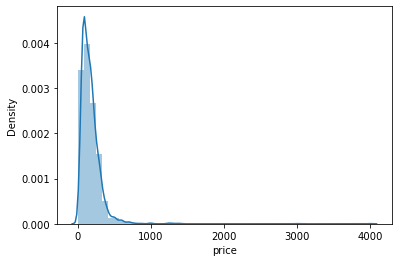

In [10]:
# check if saleprice is normally distributed in order to be used in our Multiple linear regression model later
sns.distplot(df['price']);
#we can see the saleprice is right skewed

C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


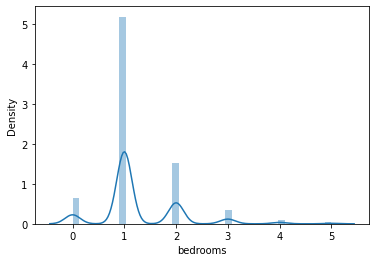

In [11]:
#check the distribution of cable_tv bedrooms
sns.distplot(df['bedrooms']);

In [12]:
#dropping any NA before putting the dataset into our model
df = df.dropna()
df.isnull().sum()

accomodates              0
air_conditioning         0
bathrooms                0
bed_type                 0
bedrooms                 0
beds                     0
cable_tv                 0
cancellation_policy      0
carbon_monoxide          0
checkin_24hr             0
cleaning_fee             0
comments                 0
dryer                    0
elevator                 0
essentials               0
extra_people             0
family_kid_friendly      0
first_aid_kit            0
free_parking             0
gym                      0
hair_dryer               0
hangers                  0
heating                  0
host_acceptance_rate     0
host_picture_url         0
host_response_rate       0
id                       0
iron                     0
kitchen                  0
latitude                 0
lock_on_bedroom_door     0
longtitude               0
number_of_reviews        0
pets_allowed             0
pool                     0
price                    0
property_type            0
r

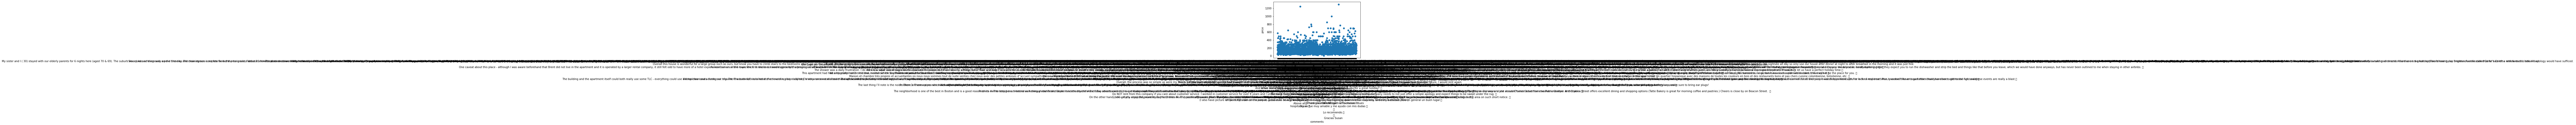

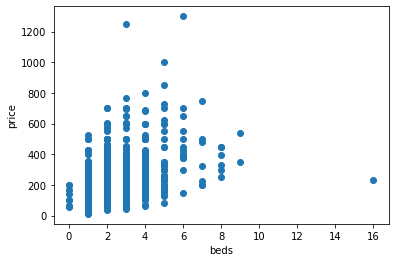

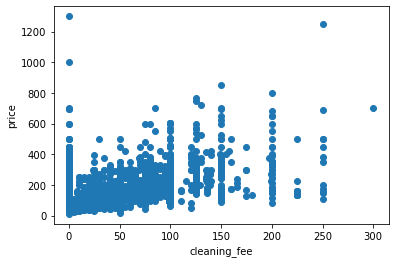

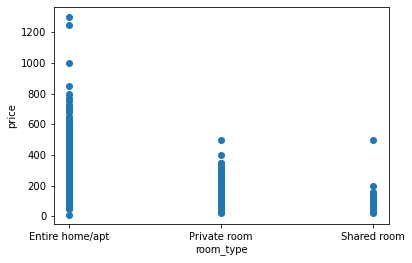

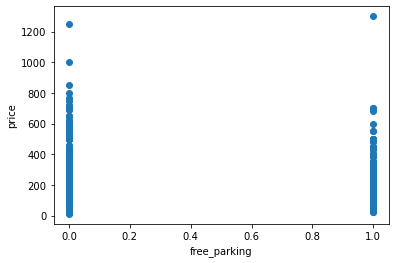

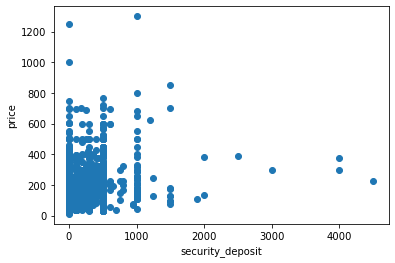

In [15]:
#See the relationship between selected features and target
x_features = [ "beds","cleaning_fee","room_type","free_parking","security_deposit"]
for x in x_features:

  plt.scatter(df[x], df['price'])
  plt.xlabel(x)
  plt.ylabel('price')
  plt.show()

# **Initial Features Selection**
we selected 15 features.

***NUmerical Category:***
Based on heatmap, pick the top 11 features that are most correlated to sales price(vmax>0.25). We also added another additional features: total_area

* accomodates
* bedrooms	
* beds
* cleaning_fee	
* bathrooms	


***Categorical Category:***
Categorical object can not be compared using heatmap so we selected a few more features based on commonsense
* comments
* host_picture_url
* bed_type
* room_type


**Use Label Encoder to to transform categorical features**

In [16]:
#transform text into numerical data by applying LabelEncoder 
from sklearn.preprocessing import LabelEncoder
cols = ['bed_type', 'cancellation_policy', 'comments', 'host_picture_url',
       'property_type', 'room_type', ]




values = []

for col in cols:
    
    names = df[col].unique
    print(f"names = {names}")
  
    le = LabelEncoder()
    le.fit(list(df[col].values))
    numbers = le.fit_transform(list(df[col].values))
    df[col] = numbers
    
    values.append({"names": names, "numbers": numbers})
    


names = <bound method Series.unique of 2            Real Bed
3            Real Bed
7            Real Bed
8            Real Bed
12           Real Bed
            ...      
3579    Pull-out Sofa
3580         Real Bed
3581         Real Bed
3582         Real Bed
3584         Real Bed
Name: bed_type, Length: 2823, dtype: object>
names = <bound method Series.unique of 2         strict
3         strict
7         strict
8       flexible
12        strict
          ...   
3579      strict
3580      strict
3581      strict
3582    moderate
3584    moderate
Name: cancellation_policy, Length: 2823, dtype: object>
names = <bound method Series.unique of 2       Spacious well equipped apartment in good area ...
3       Everything was great, maybe watch out for the ...
7       Great location for a short stay in Boston, ver...
8       David was very helpful, probably more accomoda...
12      Stayed here while visiting family in Boston.  ...
                              ...                        
3579 

<ipython-input-16-d0524ea0f5e6>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = numbers


# **Step 4: Multiple Linear Regression Model: Predict house prices based on the selected features**
* Set x and y
* Scale x and y
* Split the data into train and test (X:features, y=target)
* Create an instance of the model with model = LinearRegression().
* Train the model with the dataset with model.fit(X,y)
* Create predictions with y_pred = model.predict(X)


In [17]:
df

,accomodates,air_conditioning,bathrooms,bed_type,bedrooms,beds,cable_tv,cancellation_policy,carbon_monoxide,checkin_24hr,...,price,property_type,review_scores_rating,room_type,security_deposit,shampoo,smoke_detector,washer,wheelchair_accessible,wireless_internet
2,5,1,1.0,4,1,2,1,2,1,0,...,225,0,80,0,0,0,1,1,0,1
3,1,0,1.5,4,1,1,0,2,0,1,...,45,7,100,1,0,1,0,0,0,1
7,2,1,1.0,4,1,1,1,2,0,1,...,229,0,93,0,0,1,0,1,0,1
8,1,0,1.0,4,1,1,1,0,1,1,...,44,0,91,1,0,0,1,0,0,1
12,4,1,2.5,4,2,2,1,2,1,0,...,575,10,99,0,500,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,2,1,1.0,3,0,1,0,2,1,0,...,150,0,98,0,150,1,1,1,0,1
3580,2,1,1.0,4,1,1,1,2,1,1,...,189,3,92,0,400,1,1,1,0,1
3581,4,1,1.0,4,2,2,1,2,1,1,...,229,0,80,0,400,1,1,0,0,1
3582,4,1,1.5,4,1,1,1,1,1,0,...,130,8,100,0,250,0,1,1,0,1


In [36]:
#put our selected features into a list

cols_8 = ['air_conditioning', "longtitude", "accomodates", "bedrooms", "beds","cleaning_fee","room_type","security_deposit"]


#assign y to our target and x to our features 

y = df[['review_scores_rating','price']]
# X = df[cols_8]
X = df
X = X.drop(['price'], axis=1)
y





,review_scores_rating,price
2,80,225
3,100,45
7,93,229
8,91,44
12,99,575
...,...,...
3579,98,150
3580,92,189
3581,80,229
3582,100,130


Perform 80/20 data split

In [37]:
#data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
#check the shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2258, 44), (565, 44), (2258, 2), (565, 2))

In [38]:
X_train
y_train

,review_scores_rating,price
3442,95,130
2687,86,65
688,100,170
2760,100,90
3227,90,79
...,...,...
1186,89,65
1275,97,64
2235,80,79
3313,83,160


In [39]:
y_train_final = y_train['price'].values
y_train_final
y_test_final = y_test['price'].values
y_test_final

array([319, 160, 133, 250, 363, 250, 165, 600, 140,  52, 149, 295,  60,
        80, 215,  45, 110,  90,  45, 275, 200, 158, 115, 199, 450,  65,
       150,  80, 279, 349, 199, 180, 500, 215, 169, 250,  45, 150, 600,
       200, 115, 135, 350, 170,  60,  68, 189, 180, 165,  50, 150, 105,
       140,  84,  71, 150,  95, 175,  38, 215,  29,  99,  99, 209, 127,
       189, 150, 150, 399,  95,  58, 255,  65, 150,  90, 229, 110,  73,
       112, 310, 200, 229, 500, 220, 289,  60, 160,  79, 215, 225, 279,
        99, 279, 230,  40, 125, 149, 250,  50, 165,  60,  70, 119, 289,
       147,  80, 149, 287, 135, 220, 300, 120, 110, 300, 125, 160, 100,
       300, 200,  60,  85, 250, 150,  69, 189,  56, 200, 175,  83, 200,
       175, 300, 142, 189, 150, 119,  85, 500, 150, 210,  76,  99, 249,
       125, 125,  75, 275, 210,  85, 220, 295, 165,  60, 480, 275,  65,
       150, 110, 251,  70,  70, 110, 310, 220, 160, 235,  60, 150, 250,
        75, 170, 249, 110, 131, 229,  49, 249, 239,  70, 220, 14

In [40]:
# Reshape the y values and then print them out
y_train_final = y_train_final.reshape(-1, 1)
y_test_final = y_test_final.reshape(-1, 1)
print(y_train_final.shape)
print(y_test_final.shape)

(2258, 1)
(565, 1)


In [41]:

# Define a scaler for the X values and the y values and fit them to the training set

X_scaler = preprocessing.StandardScaler().fit(X_train[cols_8])


# Scale the training set and the testing set using the new scalers
X_train_scaled = X_scaler.transform(X_train[cols_8])
X_test_scaled = X_scaler.transform(X_test[cols_8])


#Take a log of the target to make it more normally distributed
y_train_scaled = np.log(y_train_final)
y_test_scaled = np.log(y_test_final)

**Fit data to our Multiple Linear Regression Model**

In [42]:
#define the model
model = linear_model.LinearRegression()
#build training model --> time start time 
start=datetime.now()

# Fit the model to the scaled training set
model.fit(X_train_scaled, y_train_scaled)

#time the end time
end=datetime.now()

#run prediction on scaled test set 
y_test_pred = model.predict(X_test_scaled)



In [43]:
# Export our model 
from pickle import dump as p_dump
from joblib import dump, load
dump(model, 'mlr_model.joblib') 
p_dump(X_scaler, open('scaler.pkl', 'wb'))

In [44]:
#print the coefficient, intercept, MSE and model score(R^2),and model run time
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared Error(MSE): {mean_squared_error(y_test_scaled, y_test_pred):.2f}")
print(f"Coefficient of Determination(R^2): {r2_score(y_test_scaled, y_test_pred):.2f}")
time_taken = end - start
print(f"Time to run the model: {time_taken}")


Coefficients: [[ 0.09643329  0.08251544  0.09545825  0.11344438 -0.008142    0.05618571
  -0.298502    0.0133299 ]]
Intercept: [4.91831964]
Mean squared Error(MSE): 0.15
Coefficient of Determination(R^2): 0.61
Time to run the model: 0:00:00.001943


In [45]:
y_test_pred
y_test_pred = np.exp(y_test_pred)
y_test_pred

array([[241.0833031 ],
       [ 96.14556463],
       [159.76338187],
       [267.68114558],
       [240.50994713],
       [276.88297214],
       [ 74.1418823 ],
       [366.91937234],
       [140.52530798],
       [ 77.09763699],
       [104.47623207],
       [ 94.84651048],
       [ 97.5364105 ],
       [ 86.60595817],
       [149.83584475],
       [ 81.51439278],
       [242.84405302],
       [115.92614171],
       [ 78.42011118],
       [178.58303599],
       [241.82422663],
       [155.7255456 ],
       [151.99357565],
       [217.58921178],
       [230.61429433],
       [103.51353255],
       [144.9351363 ],
       [ 82.28279945],
       [227.18926567],
       [227.82326967],
       [208.75560029],
       [237.96202876],
       [283.91199701],
       [231.43809006],
       [196.80920703],
       [221.01444835],
       [ 59.67421825],
       [178.06959242],
       [311.44972702],
       [170.07621931],
       [120.50057623],
       [110.34854145],
       [234.50394563],
       [150

In [46]:
y_test_df = pd.DataFrame(y_test)
y_test_df['y_test_pred']= y_test_pred
y_test_df
y_test_df.rename(columns={0: "saleprice"}, inplace=True)
y_test_df

y_test_df.to_csv('Resources/y_test_vs_pred_mlr.csv', index=False)


**Formula for our multiple linear regression model**

y = -2.67021895e-16 + 0.03896429*neighborhood + 0.60886396*total_area + 0.13411633*overallqual + 0.08067865*garagecars + (-0.07035814*fullbath) + 0.16385461*yearbuilt +0.12970701*yearremodadd +(-0.01437204*yrsold) 

**An example of how we get the result for different number of features**

In [47]:
cols_1 = ['comments', 'host_picture_url', 'bathrooms', 'bed_type',
       'cable_tv', 'cancellation_policy', 'carbon_monoxide',
       'checkin_24hr']
cols_2 = [
       'dryer', 'elevator',
       'essentials', 'extra_people', 'family_kid_friendly', 'first_aid_kit',
       'free_parking', 'gym', 'hair_dryer', 'hangers', 'heating']
cols_3 = [
       'host_acceptance_rate', 'air_conditioning', 'host_response_rate', 'id',
       'iron', 'kitchen',  'lock_on_bedroom_door',
       'number_of_reviews', 'pets_allowed']
cols_4 = [
       'pool', 'price', 'property_type', "latitude",
       'review_scores_rating',  'shampoo',
       'smoke_detector', 'washer', 'wheelchair_accessible',
       'wireless_internet']

cols_8 = ['air_conditioning', "longtitude", "accomodates", "bedrooms", "beds","cleaning_fee","room_type","security_deposit"]

n = [cols_1,cols_2,cols_3,cols_4, cols_8]
#assign y to our target and x to our features 

for i in n:
    y = df['price'].values
    X = df[i]
    #data is split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
    #check the shape of each set
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    print(X_train.shape)
    # Define a scaler for the X values and the y values and fit them to the training set
    X_scaler = preprocessing.StandardScaler().fit(X_train)


    # Scale the training set and the testing set using the new scalers
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)


    #Take a log to normalize the target
    y_train_scaled = np.log(y_train)
    y_test_scaled = np.log(y_test)

    # Reshape the y values and then print them out
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    #define the model
    model = linear_model.LinearRegression()
    #build training model --> time start time 
    start=datetime.now()

    # Fit the model to the scaled training set
    model.fit(X_train_scaled, y_train_scaled)

    #time the end time
    end=datetime.now()

    #run prediction on scaled test set 
    y_test_pred = model.predict(X_test_scaled)

    #print the coefficient, intercept, MSE and model score(R^2),and model run time
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean squared Error(MSE): {mean_squared_error(y_test_scaled, y_test_pred):.2f}")
    print(f"Coefficient of Determination(R^2): {r2_score(y_test_scaled, y_test_pred):.2f}")
    time_taken = end - start
    print(f"Time to run the model: {time_taken}")
    
    

(2258, 8)
Coefficients: [ 0.00578888 -0.00060652  0.11367159  0.11409895  0.17145069  0.09791111
  0.00735328  0.06938886]
Intercept: 4.918319638275107
Mean squared Error(MSE): 0.30
Coefficient of Determination(R^2): 0.24
Time to run the model: 0:00:00.001916
(2258, 11)
Coefficients: [ 0.04197398  0.13058772  0.00630739  0.05666053  0.15678056 -0.0568415
 -0.09164066  0.02414872  0.09725366 -0.07322892  0.04578362]
Intercept: 4.918319638275107
Mean squared Error(MSE): 0.32
Coefficient of Determination(R^2): 0.19
Time to run the model: 0:00:00.000997
(2258, 9)
Coefficients: [-0.09106532  0.19133793  0.06973152 -0.10491036  0.10727023  0.06870454
 -0.11736056 -0.10720166  0.032359  ]
Intercept: 4.918319638275107
Mean squared Error(MSE): 0.30
Coefficient of Determination(R^2): 0.26
Time to run the model: 0:00:00.000997
(2258, 10)
Coefficients: [ 0.01829561  0.54324499 -0.03968477  0.05689099  0.02635111  0.01382865
  0.00491244  0.00940774  0.0140343  -0.00114043]
Intercept: 4.91831963827

In [48]:
#Compare with Deep Learning Model
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
nn_model.summary()
nn_model.compile(loss="mean_squared_error", optimizer="adam")
#time starting time
start_1=datetime.now()

nn_model.fit(X_train_scaled, y_train_scaled, epochs=100)
#time ending time
end_1=datetime.now()

y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
71/71 [==============================] - 0s 865us/step - loss: 21.4187
Epoch 2/100
71/71 [==============================] - 0s 874us/step - loss: 13.9918
Epoch 3/100
71/71 [==============================] - 0s 941us/step - loss: 8.7367
Epoch 4/100
71/71 [==============================] - 0s 936us/step - loss: 5.2709
Epoch 5/100
71/71 [==============================] - 0s 989us/step - loss: 3.2489
Epoch 6/100
71/71 [==============================] - 0s 963us/step - loss: 2.1817
Epoch 7/100
71/71 [=====

In [49]:
# Evaluate the performance of the neural network
print(f"R^2 for training set: {r2_score(y_train_scaled, y_train_pred):.2f}")
print(f"R^2 for testing set: {r2_score(y_test_scaled, y_test_pred):.2f}")


R^2 for training set: 0.68
R^2 for testing set: 0.46


In [50]:
deep_model = tf.keras.models.Sequential()
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu"))
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
deep_model.summary()

deep_model.compile(loss="mean_squared_error", optimizer="adam")
#start deep learning starting time
start_2=datetime.now()
deep_model.fit(X_train_scaled, y_train_scaled, epochs=100)
#time deep learning ending time
end_2=datetime.now()
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
71/71 [==============================] - 0s 909us/step - loss: 14.2729
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 3.3383
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 1.5443
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 1.1406
Epoch 5/100
71/71 [==============================] - 0s 1ms/ste

# Evaluate the performance and run time of the deep learning model

In [51]:

print(f"R^2 for training set: {r2_score(y_train_scaled, y_train_pred):.2f}")
print(f"R^2 for testing set: {r2_score(y_test_scaled, y_test_pred):.2f}")
time_taken_neu = end_1 - start_1
time_taken_dl = end_2 - start_2
total_time = time_taken_dl + time_taken_neu
print(f"Time to run the model: {total_time}")

R^2 for training set: 0.70
R^2 for testing set: 0.57
Time to run the model: 0:00:13.476166


C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


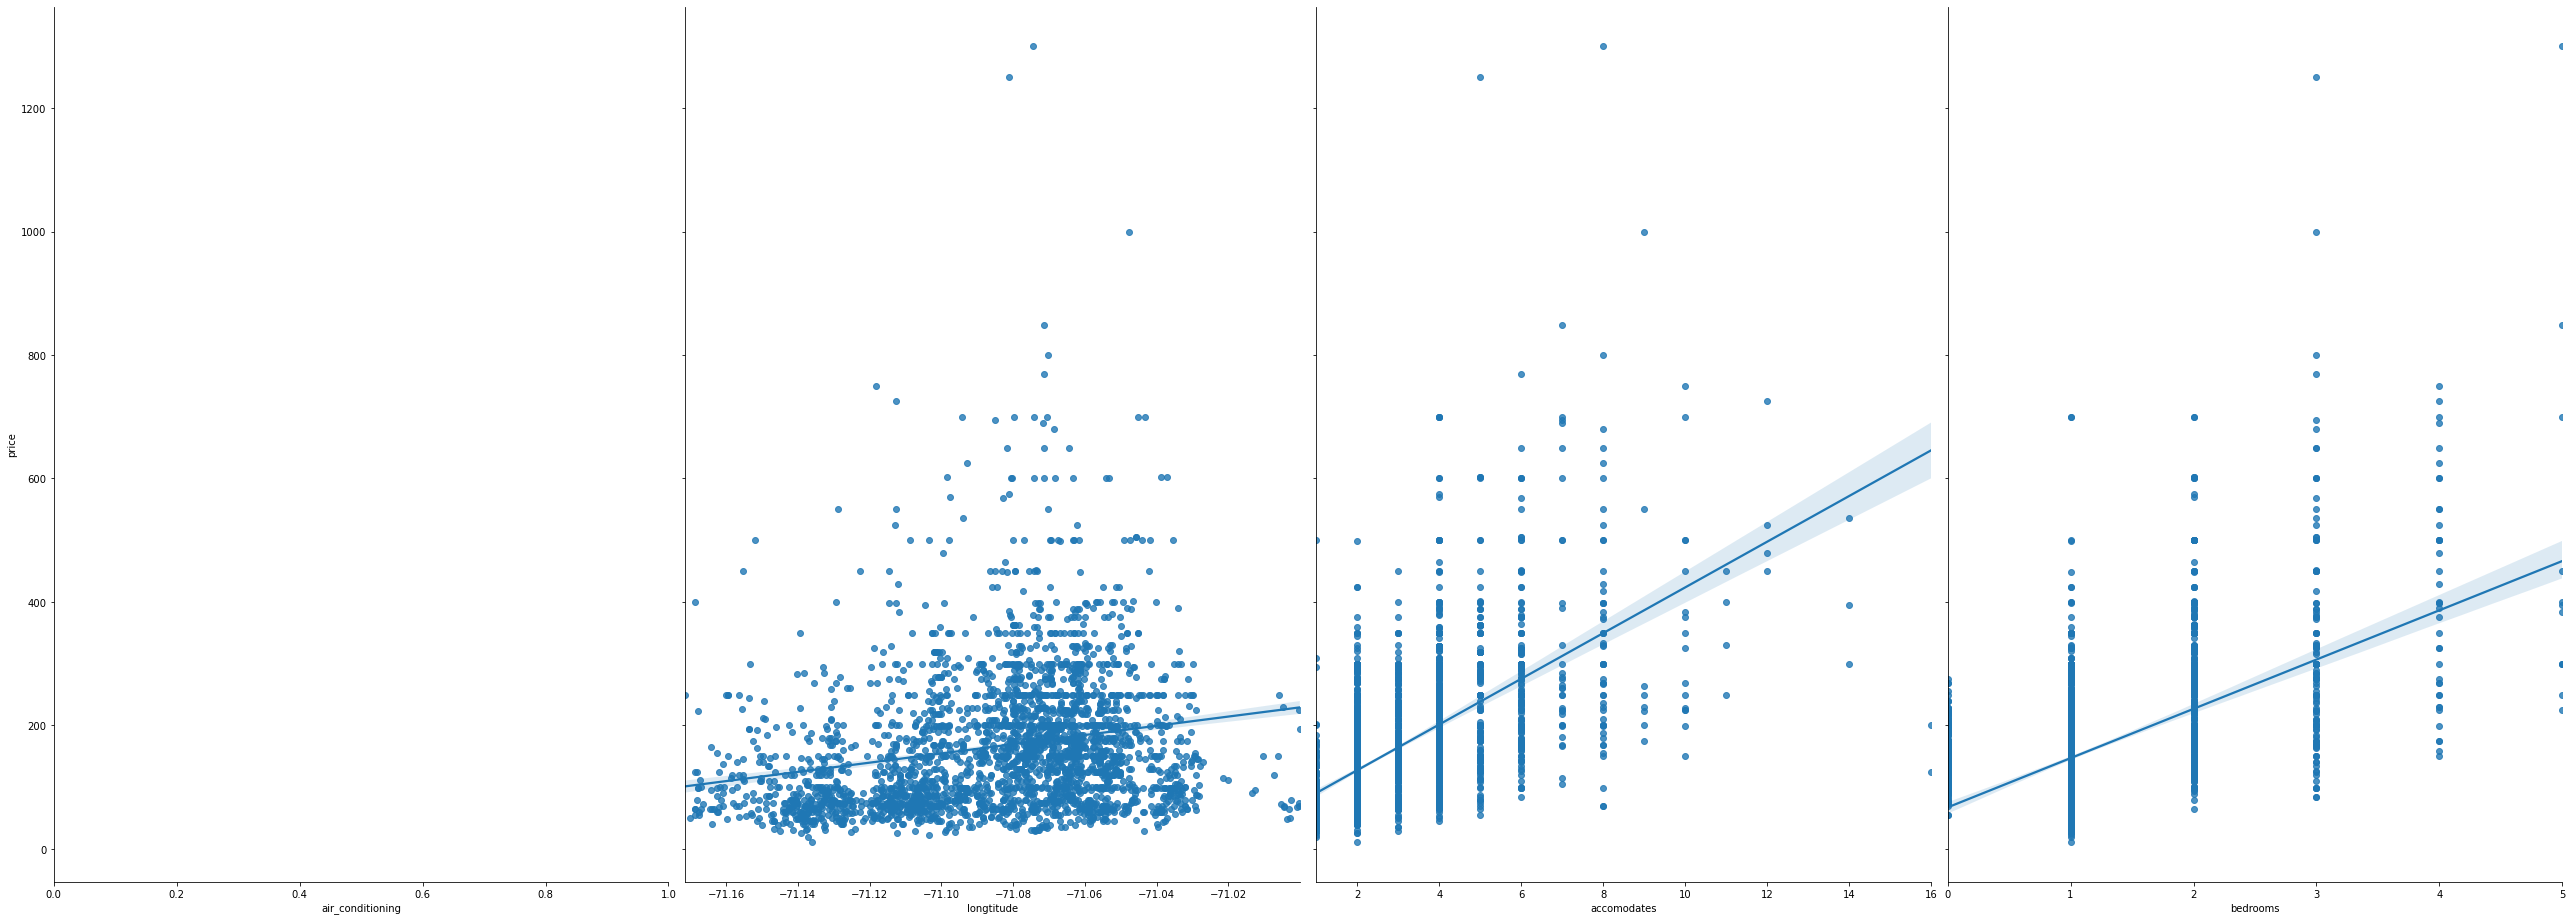

In [52]:
sns.pairplot(df, x_vars=['air_conditioning', "longtitude", "accomodates", "bedrooms"], y_vars='price', size=13, aspect=0.7, kind='reg')

C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


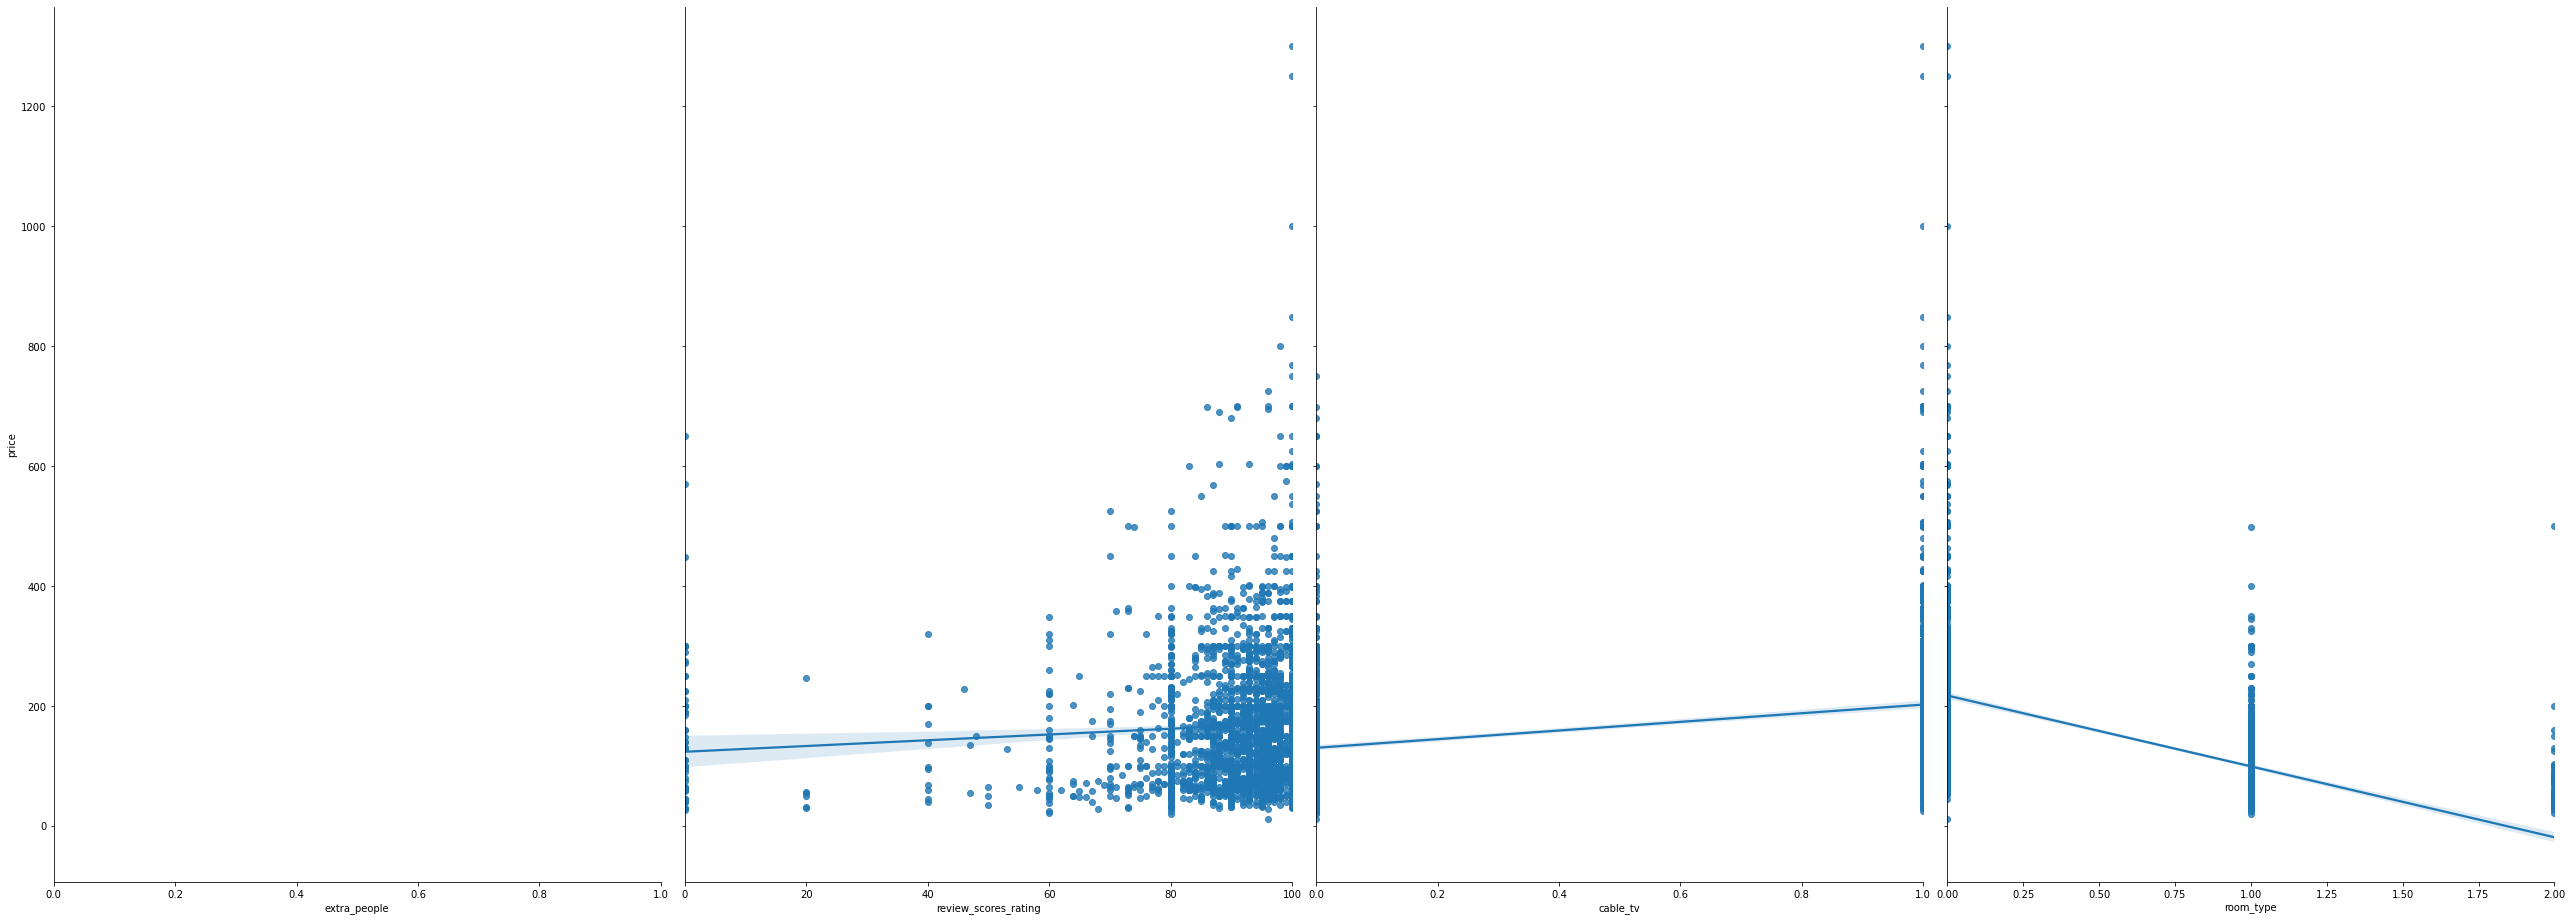

In [55]:
sns.pairplot(df, x_vars=['extra_people', 'review_scores_rating', 'cable_tv', 'room_type'], y_vars='price', size=13, aspect=0.7, kind='reg')


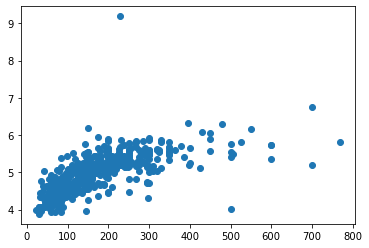

In [56]:
#graph the relationship between y_test and t_test_pred
plt.scatter(y_test, y_test_pred)
plt.show()

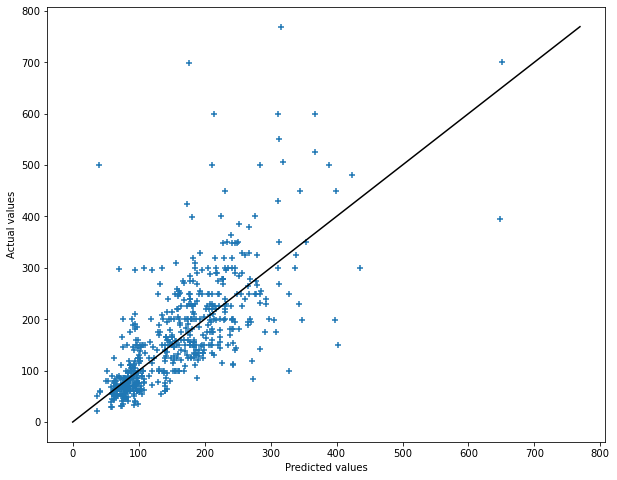

In [57]:
y_test_pred = model.predict(X_test_scaled)
#Plots predicted values against actual values in the train/test split.
plt.figure(figsize=(10,8))
plt.scatter(np.exp(y_test_pred),y_test,marker = '+')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Plots x=y line
plt.plot([0,np.max(y_test)],[0,np.max(y_test)], c = 'k');

